<a href="https://colab.research.google.com/github/LeoFernanndes/notebooks/blob/master/titanic_data_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!git clone https://github.com/LeoFernanndes/functions

fatal: destination path 'functions' already exists and is not an empty directory.


In [0]:
import pandas as pd
import numpy as np


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


url_train = 'https://raw.githubusercontent.com/LeoFernanndes/datasets/master/titanic_%20train.csv'
url_test = 'https://raw.githubusercontent.com/LeoFernanndes/datasets/master/titanic_test.csv'

columns_order = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']

train = pd.read_csv(url_train).reindex(columns_order, axis= 1)
test = pd.read_csv(url_test).reindex(columns_order.remove('Survived'), axis= 1)

dataframe = train.append(test, sort= False).set_index(np.arange(0,1309), columns_order)
dataframe_ = dataframe.iloc[:891]

In [14]:
dataframe.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

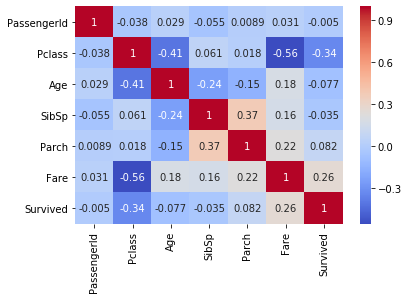

In [15]:
import seaborn as sns


g = sns.heatmap(dataframe.corr(),annot=True, cmap = "coolwarm")

In [16]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for feature in features:
  print(dataframe_.groupby(by= [feature]).mean()['Survived'].sort_values(ascending= False), '\n')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64 

SibSp
1    0.535885
2    0.464286
0    0.345395
3    0.250000
4    0.166667
8    0.000000
5    0.000000
Name: Survived, dtype: float64 

Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
6    0.000000
4    0.000000
Name: Survived, dtype: float64 

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64 



In [17]:
dataframe.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [0]:
# data cleaning and feature engineering


dataframe['Family'] = dataframe['Parch'] + dataframe['SibSp']



family_dict = {7: 0, 10: 0,
               5: 1, 4: 1,
               0: 2, 6: 2,
               1: 3, 2: 3, 3: 3}

dataframe['Family_'] = dataframe['Family'].map(family_dict)



dataframe['Sex'] = dataframe['Sex'].map({'female': 1,
                                         'male': 0})



dataframe['Fare'].fillna(dataframe['Fare'].median(), inplace= True)
dataframe['Embarked'].fillna('S', inplace= True)
dataframe['Cabin'].fillna('Unknown', inplace= True)
dataframe['Title'] = [name.split(',')[1].split('.')[0] for name in dataframe['Name']]
dataframe['Pclass'] = dataframe['Pclass'].fillna(dataframe['Pclass'].mode())
dataframe['Pclass_'] = dataframe['Pclass'].map({1: 3,
                                                2: 2,
                                                3: 1})


ages = dataframe.groupby(by= ['Title']).mean()['Age']
for title in ages.index:
  mask = dataframe['Title'] == title
  dataframe.loc[mask, 'Age'] = dataframe.loc[mask, 'Age'].fillna(value= dataframe.loc[dataframe['Title'] == title]['Age'].mean())



title_dict = {' Capt': 0, ' Don': 0, ' Jonkheer': 0, ' Rev': 0,
              ' Mr': 1, 'Dr': 1, ' Col': 1, ' Major': 1, ' Master': 1, ' Dona': 1,
              ' Miss': 2, ' Mrs': 2, ' Mme': 2, ' Sir': 2, ' Ms': 2, ' Lady': 2, ' Mlle': 2, ' the Countess': 2}

dataframe['Title_n'] = dataframe['Title'].copy().map(title_dict)



bins = [0, 12, 24, 45, 60, dataframe['Age'].max()]
labels = ['Child', 'Young Adult', 'Adult','Older Adult','Senior']
dataframe['Age_'] = pd.cut(dataframe["Age"], bins, labels = labels)



bins = [0, 8, 16, 24, 32, dataframe['Fare'].max()]
labels = ['low_price', 'tier2', 'tier3','tier4','high_price']
dataframe['Fare_'] = pd.cut(dataframe['Fare'], bins, labels = labels)

In [21]:
dataframe.dtypes
dataframe

PassengerId       int64
Pclass            int64
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Survived        float64
Family            int64
Family_           int64
Title            object
Pclass_           int64
Title_n         float64
Age_           category
Fare_          category
dtype: object

In [19]:
from functions import data_preprocessing


data_preprocessing.naive_data_preparation(dataframe)
#datraframe_ = dataframe.copy().loc[(dataframe['Survived'] == 1) | (dataframe['Survived'] == 0)]

TypeError: ignored

In [0]:
dataframe_

In [0]:
from sklearn.model_selection import cross_val_score
from xgboost  import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


clf = RandomForestClassifier(n_estimators= 100)

cross_val_score(clf,dataframe_[dataframe_.columns[:-1]], dataframe_['Survived'], cv= 10)

In [0]:
def naive_data_preparation1(dataset):
    '''

    Function used to fill in the gaps with mean for continous features and mode for the discrete ones and apply
    naive label encoding without concerns about the suitability of dummy variables.

    '''
    import pandas as pd
    from sklearn.preprocessing import LabelEncoder

    for column in dataset.columns:
        if dataset[column].dtype == 'object':
          dataset[column] = dataset[column].astype('str')
          dataset[column].fillna(dataset[column].mode(), inplace=True)
        
        elif dataset[column].dtype == 'category':
          dataset[column] = dataset[column].astype('str')
          dataset[column].fillna(dataset[column].mode(), inplace= True)

        elif dataset[column].dtype == 'int':
          dataset[column].fillna(dataset[column].mode(), inplace= True)

        elif dataset[column].dtype == 'float':
          dataset[column].fillna(dataset[column].mean(), inplace= True)

        else:
            dataset[column] = dataset[column].astype('str')
            dataset[column].fillna(dataset[column].mode(), inplace=True)

    le = LabelEncoder()

    for column in dataset.columns:
        if dataset[column].dtype == 'object':
            dataset[column] = le.fit_transform(dataset[column])

In [34]:
naive_data_preparation1(dataframe)

TypeError: ignored